In [1]:
import mlflow
import pandas as pd
import seaborn as sns
import compare_featuresets as cf
import numpy as np

In [2]:
glpe_runs = mlflow.search_runs(experiment_ids=['2']).fillna(value=np.nan)


In [3]:
best_cpe_runs = cf.get_precomputed_directed_pagerank(glpe_runs)
best_lpe_runs = cf.get_max_config(glpe_runs, 'LPE')

/data4/mankovic/GSE73072/experiments/compare_featuresets.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_runs = best_runs.append(best_run, ignore_index = True)
/data4/mankovic/GSE73072/experiments/compare_featuresets.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_runs = best_runs.append(best_run, ignore_index = True)
/data4/mankovic/GSE73072/experiments/compare_featuresets.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_runs = best_runs.append(best_run, ignore_index = True)
/data4/mankovic/GSE73072/experiments/compare_featuresets.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_runs = best_runs.ap

In [20]:
def get_pathways(exp_id, best_runs):
    query = best_runs['params.experiment'] == exp_id
    run = best_runs[query]
    pathways = pd.read_csv(os.path.join(run.filter(regex='artifact').iloc[0,0], 'pathway_ranks.csv'), dtype=object, index_col = 0).dropna(how = 'all')

    return pathways
        

In [12]:
all_cpe_pathways = set()
all_lpe_pathways = set()

experiments = []
for exp in best_lpe_runs['params.experiment']:
    if 'limma' in exp:
        cpe_pathways = cf.get_pathways_glpe(exp, best_cpe_runs)
        lpe_pathways = cf.get_pathways_glpe(exp, best_lpe_runs)

        all_cpe_pathways = all_cpe_pathways.union(set(cpe_pathways))
        all_lpe_pathways = all_lpe_pathways.union(set(lpe_pathways))

        experiments.append('_'.join(exp.split('_')[1:-2]))


        

In [25]:
all_cpe_pathways = list(all_cpe_pathways)
all_lpe_pathways = list(all_lpe_pathways)

In [26]:
cpe_heat_map = pd.DataFrame(columns = all_cpe_pathways, index = experiments)
lpe_heat_map = pd.DataFrame(columns = all_lpe_pathways, index = experiments)

In [27]:

for exp in best_lpe_runs['params.experiment']:
    if 'limma' in exp:

        exp_index = '_'.join(exp.split('_')[1:-2])
        cpe_pathways = get_pathways(exp, best_cpe_runs)
        lpe_pathways = get_pathways(exp, best_lpe_runs)



        cpe_heat_map.loc[exp_index, all_cpe_pathways] = cpe_pathways.loc[ all_cpe_pathways, 'batch:absWeights']
        lpe_heat_map.loc[exp_index, all_lpe_pathways] = lpe_pathways.loc[ all_lpe_pathways, 'batch:absWeights']

In [61]:
sorted_exp = ['4to2_1_8', '4to2_9_16', '4to2_17_24', '4to2_25_32', '6to1_1_8', '6to1_9_16', '6to1_17_24', '6to1_25_32']

cpe_heat_map = cpe_heat_map.loc[sorted_exp]
lpe_heat_map = lpe_heat_map.loc[sorted_exp]

exp_map = {'4to2_1_8': '4 studies, 1 to 8hr', '4to2_9_16': '4 studies, 9 to 16hr', '4to2_17_24': '4 studies, 17 to 24hr', '4to2_25_32':'4 studies, 25 to 32hr', 
           '6to1_1_8': '6 studies, 1 to 8hr', '6to1_9_16': '6 studies, 9 to 16hr' , '6to1_17_24': '6 studies, 17 to 24hr', '6to1_25_32':'6 studies, 25 to 35hr'}

cpe_heat_map = cpe_heat_map.rename(index=exp_map)
lpe_heat_map = lpe_heat_map.rename(index=exp_map)

KeyError: "None of [Index(['4to2_1_8', '4to2_9_16', '4to2_17_24', '4to2_25_32', '6to1_1_8',\n       '6to1_9_16', '6to1_17_24', '6to1_25_32'],\n      dtype='object')] are in the [index]"

In [62]:
cpe_heat_map = cpe_heat_map.astype(float)
lpe_heat_map = lpe_heat_map.astype(float)

Text(0.5, 32.0, 'Pathways')

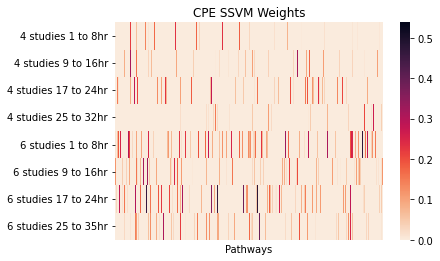

In [67]:
s = sns.heatmap(data = cpe_heat_map, cmap = "rocket_r", xticklabels=False)
s.set_title('CPE SSVM Weights')
s.set_xlabel('Pathways')


Text(0.5, 32.0, 'Pathways')

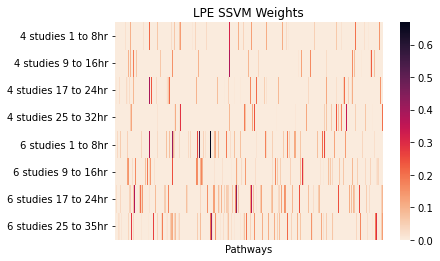

In [68]:
s = sns.heatmap(data = lpe_heat_map, cmap = "rocket_r", xticklabels=False)
s.set_title('LPE SSVM Weights')
s.set_xlabel('Pathways')

In [55]:
lpe_heat_map.sum(axis = 0).sort_values()[-10:]


R-HSA-8941413    1.012198
R-HSA-68881      1.069359
R-HSA-5649702    1.185815
R-HSA-9729555    1.219719
R-HSA-74713      1.290201
R-HSA-5676594    1.493551
R-HSA-168330     1.566362
R-HSA-5603037    1.568497
R-HSA-5678420    1.626672
R-HSA-156584     1.700376
dtype: float64

/tmp/ipykernel_43202/3039978104.py:6: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.set_xticks([])


[]

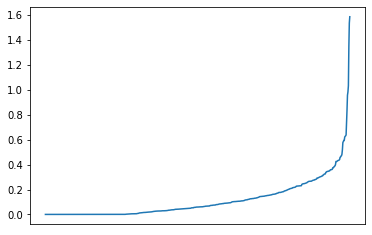

In [90]:
import matplotlib.pyplot as plt
cpe_ranks = cpe_heat_map.sum(axis = 0).sort_values()
fig,ax = plt.subplots()
plt.plot(cpe_ranks)
ax.set_xticklabels([])
ax.set_xticks([])
plt.ylabel('Total SVM Weights')
plt.xlabel('Pathway')
plt.title('SVM Weights CPE')

In [86]:
cpe_ranks

R-HSA-168249     3.035784e-08
R-HSA-112316     5.320192e-08
R-HSA-174437     6.247406e-08
R-HSA-210500     7.164902e-08
R-HSA-500792     7.521041e-08
                     ...     
R-HSA-5676594    9.830327e-01
R-HSA-9634635    1.033106e+00
R-HSA-5603037    1.346281e+00
R-HSA-74713      1.536044e+00
R-HSA-3595177    1.586865e+00
Length: 661, dtype: float64

In [82]:
lpe_ranks = lpe_heat_map.sum(axis = 0).sort_values()
idx = lpe_ranks >= .
lpe_best = list(lpe_ranks[idx].index)

In [83]:
lpe_best

['R-HSA-5676594',
 'R-HSA-5603037',
 'R-HSA-5250989',
 'R-HSA-200425',
 'R-HSA-68881',
 'R-HSA-5678420',
 'R-HSA-9729555',
 'R-HSA-156584']